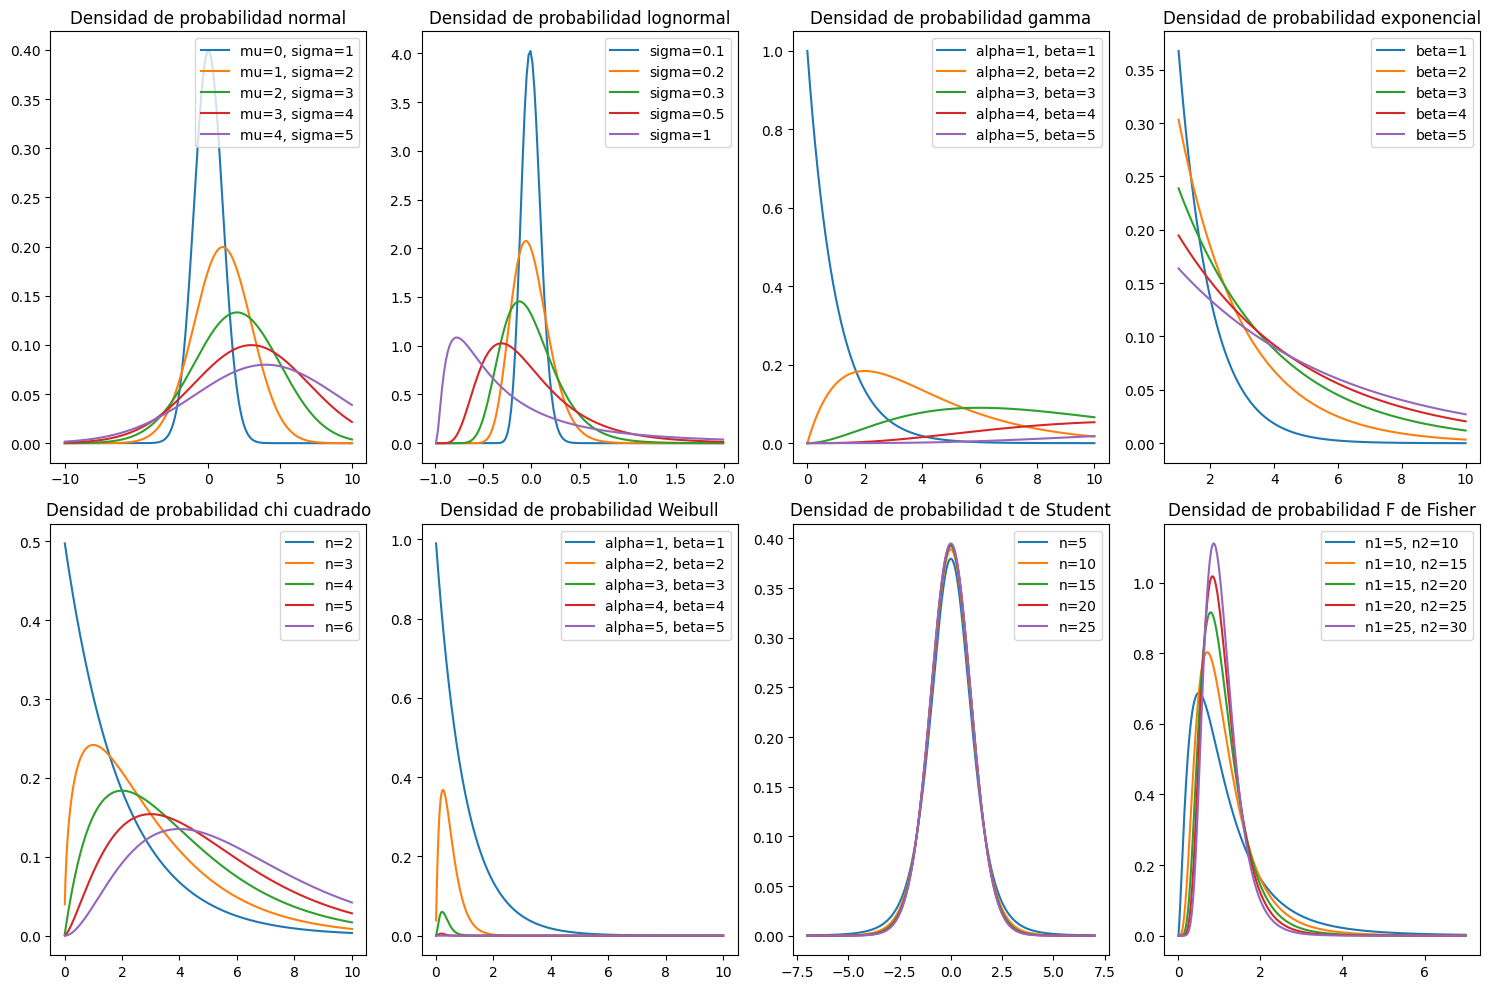

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma as gamma_function
from scipy.special import gamma
from scipy.special import beta as scipy_beta

mu_values = [0, 1, 2, 3, 4]
sigma_values = [1, 2, 3, 4, 5]
alpha_values = [1, 2, 3, 4, 5]
beta_values = [1, 2, 3, 4, 5]
n_values = [2, 3, 4, 5, 6]

# Funciones de densidad de probabilidad
def normal_density(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def lognormal_density(x, sigma):
    mu = -0.5 * sigma ** 2
    x_prime = np.log(1 + x)
    return normal_density(x_prime, mu, sigma) / (x + 1)

def gamma_density(x, alpha, beta):
    return 1 / (beta ** alpha * gamma_function(alpha)) * x ** (alpha - 1) * np.exp(-x / beta)

def exponential_density(x, beta):
    return 1 / beta * np.exp(-x / beta)

def chi_squared_density(x, n):
    return np.where(x > 0, 1 / (2 ** (n / 2) * gamma_function(n / 2)) * x ** (n / 2 - 1) * np.exp(-x / 2), 0)

def weibull_density(x, alpha, beta):
    return np.where(x > 0, alpha * beta * x ** (beta - 1) * np.exp(-alpha * beta * x), 0)

def student_t_density(x, n):
    normalization = 1 / (np.sqrt(n) * scipy_beta(1/2, n/2))
    return normalization * (1 + x**2 / n) ** (- (n + 1) / 2)

def fisher_f_density(x, n1, n2):
    numerator = gamma((n1 + n2) / 2) * (n1 / n2)**(n1 / 2)
    denominator = gamma(n1 / 2) * gamma(n2 / 2)
    return numerator / denominator * x**((n1 / 2) - 1) / (1 + (n1 / n2) * x)**((n1 + n2) / 2)

x_values = np.linspace(-10, 10, 1000)

fig, axs = plt.subplots(2, 4, figsize=(15, 10))

# Densidad de probabilidad normal
for i, (mu, sigma) in enumerate(zip(mu_values, sigma_values)):
    axs[0, 0].plot(x_values, normal_density(x_values, mu, sigma), label=f'mu={mu}, sigma={sigma}')
axs[0, 0].set_title('Densidad de probabilidad normal')
axs[0, 0].legend()

sigma_values = [0.1, 0.2, 0.3, 0.5, 1]

# Densidad de probabilidad lognormal
for i, sigma in enumerate(sigma_values):
    axs[0, 1].plot(x_values[(x_values>-1) & (x_values <2)], lognormal_density(x_values[(x_values>-1) & (x_values<2)], sigma), label=f'sigma={sigma}')
axs[0, 1].set_title('Densidad de probabilidad lognormal')
axs[0, 1].legend()

x_values = np.linspace(0, 10, 1000)

# Densidad de probabilidad gamma
for i, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):
    axs[0, 2].plot(x_values, gamma_density(x_values, alpha, beta), label=f'alpha={alpha}, beta={beta}')
axs[0, 2].set_title('Densidad de probabilidad gamma')
axs[0, 2].legend()

# Densidad de probabilidad exponencial
for i, beta in enumerate(beta_values):
    axs[0, 3].plot(x_values[x_values>1], exponential_density(x_values[x_values>1], beta), label=f'beta={beta}')
axs[0, 3].set_title('Densidad de probabilidad exponencial')
axs[0, 3].legend()

# Densidad de probabilidad chi cuadrado
for i, n in enumerate(n_values):
    axs[1, 0].plot(x_values[x_values>0], chi_squared_density(x_values[x_values>0], n), label=f'n={n}')
axs[1, 0].set_title('Densidad de probabilidad chi cuadrado')
axs[1, 0].legend()

# Densidad de probabilidad Weibull
for i, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):
    axs[1, 1].plot(x_values[x_values>0], weibull_density(x_values[x_values>0], alpha, beta), label=f'alpha={alpha}, beta={beta}')
axs[1, 1].set_title('Densidad de probabilidad Weibull')
axs[1, 1].legend()


x_values = np.linspace(-7, 7, 1000)

# Densidad de probabilidad t de Student
n_student_values = [5, 10, 15, 20, 25]
for i, n_student in enumerate(n_student_values):
    axs[1, 2].plot(x_values, student_t_density(x_values, n_student), label=f'n={n_student}')
axs[1, 2].set_title('Densidad de probabilidad t de Student')
axs[1, 2].legend()

# Densidad de probabilidad F de Fisher
n1_fisher_values = [5, 10, 15, 20, 25]
n2_fisher_values = [10, 15, 20, 25, 30]
for i, (n1_fisher, n2_fisher) in enumerate(zip(n1_fisher_values, n2_fisher_values)):
    axs[1, 3].plot(x_values[x_values>0], fisher_f_density(x_values[x_values>0], n1_fisher, n2_fisher), label=f'n1={n1_fisher}, n2={n2_fisher}')
axs[1, 3].set_title('Densidad de probabilidad F de Fisher')
axs[1, 3].legend()

plt.tight_layout()

plt.show()


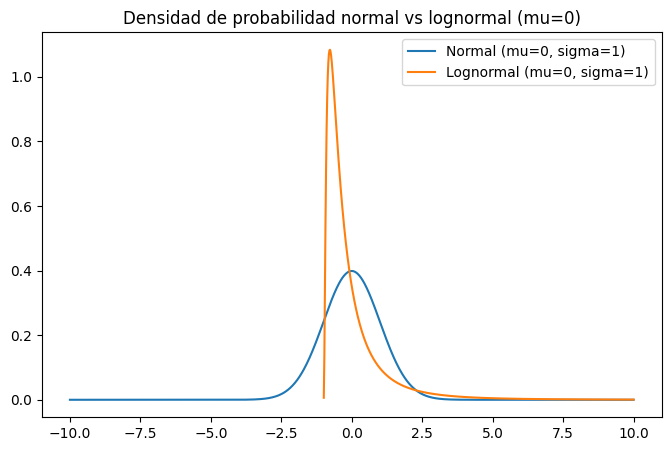

In [ ]:
x_values = np.linspace(-10, 10, 1000)

fig, ax = plt.subplots(figsize=(8, 5))

sigma_normal = 1
ax.plot(x_values, normal_density(x_values, 0, sigma_normal), label=f'Normal (mu=0, sigma={sigma_normal})')

sigma_lognormal = 1
ax.plot(x_values[x_values>-1], lognormal_density(x_values[x_values>-1], sigma_lognormal), label=f'Lognormal (mu=0, sigma={sigma_lognormal})')

ax.set_title('Densidad de probabilidad normal vs lognormal (mu=0)')
ax.legend()

plt.show()
